## imports

In [12]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## cars.com -- use desired search parameters (best to use a range of years), scroll down and select "100 results per page", copy links into 'links' list as strings.

In [13]:
links = ['https://www.cars.com/shopping/results/?list_price_max=&makes[]=honda&maximum_distance=all&models[]=honda-civic&page=1&page_size=100&stock_type=all&zip='
'https://www.cars.com/shopping/results/?page=2&page_size=100&list_price_max=&makes[]=honda&maximum_distance=all&models[]=honda-civic&stock_type=all&zip='
'https://www.cars.com/shopping/results/?page=3&page_size=100&list_price_max=&makes[]=honda&maximum_distance=all&models[]=honda-civic&stock_type=all&zip='
'https://www.cars.com/shopping/results/?page=4&page_size=100&list_price_max=&makes[]=honda&maximum_distance=all&models[]=honda-civic&stock_type=all&zip='
'https://www.cars.com/shopping/results/?page=5&page_size=100&list_price_max=&makes[]=honda&maximum_distance=all&models[]=honda-civic&stock_type=all&zip=']

## cleaning data and creating dataframe

In [14]:
cleaned_prices = []
cleaned_titles = []
for link in links:
    response = requests.get(link)
    soup = BeautifulSoup(response.text, 'html.parser')
    prices = [span.text for span in soup.find_all('span', {'class': 'primary-price'})]
    for price in prices:
        try:
            cleaned_price = int(price.replace(',', '').replace('$', ''))
            cleaned_prices.append(cleaned_price)
        except ValueError:
            cleaned_prices.append(np.nan)

    titles = soup.find_all('h2', {'class': "title"})
    cleaned_titles.extend([title.text for title in titles])
    
df = pd.DataFrame({'Price': cleaned_prices, 'Model Name': cleaned_titles})
df['Year'] = df['Model Name'].str.extract(r'(\d{4})').astype(int)
df['Model Name'] = df['Model Name'].str.replace(r'(\d{4})', '')

<ipython-input-14-5d1705dfa93f>:19: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Model Name'] = df['Model Name'].str.replace(r'(\d{4})', '')


## data analysis

"Average Price by Year" Bar Graph

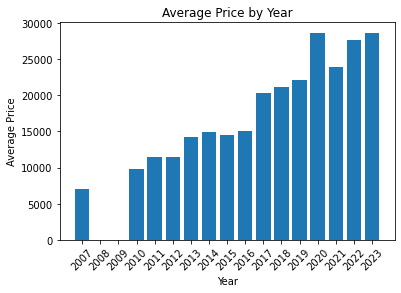

In [15]:
grouped = df.groupby('Year').mean()
plt.bar(grouped.index, grouped['Price'])
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Price by Year')
plt.xticks(np.arange(min(grouped.index), max(grouped.index)+1, 1), rotation=45)
plt.show()

"Price Distribution" Histogram

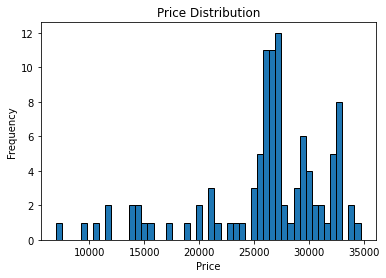

In [16]:
plt.hist(df['Price'], bins=50, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

"Model Name Counts" Horizontal Bar Graph

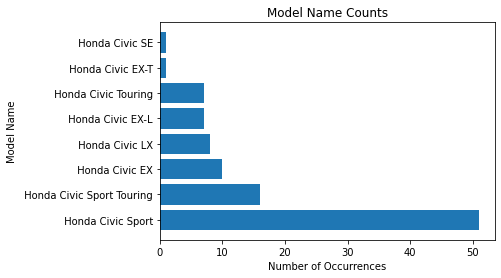

In [17]:
model_counts = df['Model Name'].value_counts()
plt.barh(model_counts.index, model_counts.values)
plt.xlabel('Number of Occurrences')
plt.ylabel('Model Name')
plt.title('Model Name Counts')
plt.show()

"Price vs Year" Scatter Plot

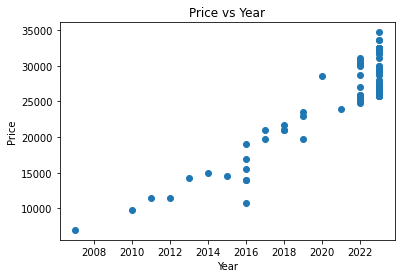

In [18]:
plt.scatter(df['Year'], df['Price'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Price vs Year')
plt.show()